In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [15]:
dftrain = pd.read_csv(r'D:\Ngoding\Belajar Python\Legowo\WarmupDatavidia\train.csv')
dftest = pd.read_csv(r'D:\Ngoding\Belajar Python\Legowo\WarmupDatavidia\test.csv')
dfsubm = pd.read_csv(r'D:\Ngoding\Belajar Python\Legowo\WarmupDatavidia\sample_submission.csv')

dftrain

,Unnamed: 0,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,...,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
0,0,Afghanistan/1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1,Afghanistan/1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,2,Afghanistan/1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,3,Afghanistan/1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,4,Afghanistan/1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,5598,Zimbabwe/2010,2795.6192,283.6316,109.3055,3.0243,0.0,87.000000,157.6366,262.6108,...,302.3508,0.0,0.0,2074.1869,9410211.0,4676106.0,6034165.0,6805605.0,23601.395453,0.911917
5599,5599,Zimbabwe/2011,2918.2098,168.1659,100.7798,3.7456,0.0,94.000000,268.6740,648.0808,...,312.2478,0.0,0.0,966.3719,9636932.0,4749717.0,6114111.0,6911674.0,23470.631605,0.191167
5600,5600,Zimbabwe/2012,2164.8953,259.4249,103.8422,5.5527,0.0,91.000000,304.6578,648.0808,...,314.3433,0.0,0.0,908.2629,9880721.0,4830105.0,6223803.0,7041528.0,22903.232305,0.337000
5601,5601,Zimbabwe/2013,1544.9329,238.1898,96.8978,5.8016,0.0,73.000000,338.5506,648.0808,...,317.9359,0.0,0.0,546.0138,10138667.0,4915839.0,6363142.0,7192279.0,22245.497305,0.089667


In [25]:

dftrain = dftrain.drop(columns = ['Unnamed: 0'])

In [53]:
dftrain.iloc[:, :30].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Negara/Tahun                                 5603 non-null   object 
 1   Emisi Savanna Api                            5603 non-null   float64
 2   Emisi Kebakaran Hutan                        5603 non-null   float64
 3   Emisi Residu Tanaman                         5603 non-null   float64
 4   Emisi Budidaya Padi                          5603 non-null   float64
 5   Emisi Tanah Organik Yang Dikeringkan (Co2)   5603 non-null   float64
 6   Emisi Pembuatan Pestisida                    5603 non-null   float64
 7   Emisi Transportasi Makanan                   5603 non-null   float64
 8   Lahan Hutan                                  5603 non-null   float64
 9   Konversi Hutan Bersih                        5603 non-null   float64
 10  

In [18]:
missing_columns = dftrain.columns[dftrain.isnull().any()]
print(missing_columns)

Index(['Emisi Savanna Api', 'Emisi Kebakaran Hutan', 'Emisi Residu Tanaman',
       'Lahan Hutan', 'Konversi Hutan Bersih',
       'Emisi Konsumsi Rumah Tangga Makanan', 'Emisi IPPU',
       'Emisi Kotoran Diterapkan Pada Tanah', 'Emisi Manajemen Pupuk',
       'Emisi Kebakaran Di Hutan Tropis Yang Lembab',
       'Penggunaan Energi Di Pertanian'],
      dtype='object')


In [21]:
dftrain.fillna(0, inplace=True)

In [27]:
null = dftrain.isnull().sum()
null

Negara/Tahun                                   0
Emisi Savanna Api                              0
Emisi Kebakaran Hutan                          0
Emisi Residu Tanaman                           0
Emisi Budidaya Padi                            0
Emisi Tanah Organik Yang Dikeringkan (Co2)     0
Emisi Pembuatan Pestisida                      0
Emisi Transportasi Makanan                     0
Lahan Hutan                                    0
Konversi Hutan Bersih                          0
Emisi Konsumsi Rumah Tangga Makanan            0
Emisi Ritel Makanan                            0
Emisi Penggunaan Listrik Di Pertanian          0
Emisi Kemasan Makanan                          0
Emisi Sistem Agrifood Pembuangan Limbah        0
Emisi Pengolahan Makanan                       0
Emisi Manufaktur Pupuk                         0
Emisi IPPU                                     0
Emisi Kotoran Diterapkan Pada Tanah            0
Emisi Pupuk Kandang Di Padang Rumput           0
Emisi Manajemen Pupu

In [28]:
dftest.head()

,Unnamed: 0,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,...,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total
0,0,Afghanistan/2015,0.8454,0.0,403.3181,642.8800,0.0,81.852555,440.0315,-246.2191,...,2719.1528,797.9007,0.0,0.0,NaN,25368923.0,8367571.0,17071446.0,16682054.0,12652.876111
1,1,Afghanistan/2016,1.6558,0.0,387.6130,466.4800,0.0,54.909681,340.8931,154.6574,...,2692.9570,793.9377,0.0,0.0,NaN,25985093.0,8670939.0,17520861.0,17115346.0,12988.384380
2,2,Afghanistan/2017,0.4015,0.0,344.6447,429.0518,0.0,55.148427,345.7609,154.6574,...,2680.8381,768.6802,0.0,0.0,NaN,26558609.0,8971472.0,18028696.0,17614722.0,12786.218762
3,3,Afghanistan/2018,0.2008,0.0,291.7838,460.7529,0.0,72.743150,407.6310,154.6574,...,2716.9079,789.3364,0.0,0.0,NaN,27099874.0,9273302.0,18549862.0,18136922.0,13054.982649
4,4,Afghanistan/2019,7.1050,0.0,395.2689,499.9176,0.0,80.806938,489.7252,154.6574,...,2557.4329,766.5012,0.0,0.0,NaN,27626382.0,9582625.0,19090409.0,18679089.0,13354.360473


In [34]:
dftest.fillna(0, inplace=True)

In [35]:
null = dftest.isnull().sum()
null

Unnamed: 0                                     0
Negara/Tahun                                   0
Emisi Savanna Api                              0
Emisi Kebakaran Hutan                          0
Emisi Residu Tanaman                           0
Emisi Budidaya Padi                            0
Emisi Tanah Organik Yang Dikeringkan (Co2)     0
Emisi Pembuatan Pestisida                      0
Emisi Transportasi Makanan                     0
Lahan Hutan                                    0
Konversi Hutan Bersih                          0
Emisi Konsumsi Rumah Tangga Makanan            0
Emisi Ritel Makanan                            0
Emisi Penggunaan Listrik Di Pertanian          0
Emisi Kemasan Makanan                          0
Emisi Sistem Agrifood Pembuangan Limbah        0
Emisi Pengolahan Makanan                       0
Emisi Manufaktur Pupuk                         0
Emisi IPPU                                     0
Emisi Kotoran Diterapkan Pada Tanah            0
Emisi Pupuk Kandang 

CEK DUPLICATE

In [39]:
duplicates = dftest[dftest.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, Negara/Tahun, Emisi Savanna Api, Emisi Kebakaran Hutan, Emisi Residu Tanaman, Emisi Budidaya Padi, Emisi Tanah Organik Yang Dikeringkan (Co2), Emisi Pembuatan Pestisida, Emisi Transportasi Makanan, Lahan Hutan, Konversi Hutan Bersih, Emisi Konsumsi Rumah Tangga Makanan, Emisi Ritel Makanan, Emisi Penggunaan Listrik Di Pertanian, Emisi Kemasan Makanan, Emisi Sistem Agrifood Pembuangan Limbah, Emisi Pengolahan Makanan, Emisi Manufaktur Pupuk, Emisi IPPU, Emisi Kotoran Diterapkan Pada Tanah, Emisi Pupuk Kandang Di Padang Rumput, Emisi Manajemen Pupuk, Emisi Kebakaran Di Tanah Organik, Emisi Kebakaran Di Hutan Tropis Yang Lembab, Penggunaan Energi Di Pertanian, Populasi Pedesaan, Populasi Perkotaan, Total Populasi - Pria, Total Populasi - Wanita, Emisi Total]
Index: []

[0 rows x 30 columns]


CEK OUTLIER BERMASALAH PAK DANI

In [40]:
dftrain.describe()

,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,...,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
count,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5.603000e+03,5603.000000,...,5603.000000,5603.000000,5603.000000,5603.000000,5.603000e+03,5.603000e+03,5.603000e+03,5.603000e+03,5.603000e+03,5603.000000
mean,1224.167856,911.903141,759.804527,4241.101704,3471.791570,327.522289,1823.138303,-16859.945573,1.714693e+04,3992.371186,...,1950.443570,1254.336085,653.374878,2594.894901,1.794903e+07,1.573881e+07,1.703881e+07,1.675670e+07,6.057137e+04,0.750170
std,5460.744585,3669.321242,3152.879734,17599.627763,15488.661938,1445.484865,5306.417931,78259.855234,1.042153e+05,19990.240075,...,7493.281613,23189.667834,3208.148456,11541.383006,9.073657e+07,5.920313e+07,7.398219e+07,7.056196e+07,2.084904e+05,0.498943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.700000e+02,3.000000e+02,-3.918841e+05,-1.415833
25%,0.000000,0.000000,0.027750,172.219300,0.000000,5.000000,26.262663,-2492.962300,0.000000e+00,5.107800,...,9.495100,0.000000,0.000000,4.444350,9.431400e+04,2.045720e+05,1.948370e+05,2.003545e+05,5.135030e+03,0.440333
50%,1.613300,0.521300,41.571100,515.517200,0.000000,12.328281,176.065300,-38.319800,9.029000e+00,95.550400,...,149.935500,0.000000,0.000000,49.389200,1.572038e+06,2.201558e+06,2.336340e+06,2.338950e+06,1.174802e+04,0.729750
75%,109.114000,67.124100,254.561100,1551.410550,694.164500,106.981731,1135.649750,0.000000,3.830905e+03,1172.529050,...,858.484250,0.000000,8.195550,859.227050,7.836860e+06,7.690343e+06,8.586906e+06,8.617358e+06,3.292111e+04,1.030167
max,114616.401100,52227.630600,30638.533800,164915.255600,232118.469400,16459.000000,62048.167300,171121.076000,1.605106e+06,344626.339200,...,70592.646500,991717.543100,51771.256800,248879.176900,8.748576e+08,7.799545e+08,7.243639e+08,6.922046e+08,2.741630e+06,3.143000


In [41]:
def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [43]:
for col in dftrain.drop(columns=['Negara/Tahun']).columns:
    outliers = detect_outliers(dftrain[col])     
    print(f"{col} = {outliers}")

Emisi Savanna Api = [25197.622, 25197.622, 25197.622, 25197.622, 25197.622, 25197.622, 21984.4601, 21270.424, 23616.9798, 21442.8702, 22054.1589, 22629.0575, 24825.0733, 29226.7282, 29319.9661, 28379.7735, 25545.5076, 27530.1319, 25535.3219, 25323.3376, 26651.2633, 27496.752, 25620.926, 26174.3841, 24715.7104, 54273.0251, 54273.0251, 54273.0251, 54273.0251, 54273.0251, 54273.0251, 41482.8427, 39327.1417, 46003.5701, 77956.9447, 92588.6108, 112373.8273, 99437.1279, 28146.216, 67261.1546, 24784.8688, 64295.8067, 59533.2123, 31314.8366, 37613.7109, 17618.8264, 114616.4011, 112381.0135, 29147.2144, 51470.4268, 23503.3214, 23384.4771, 21150.956, 21150.956, 21150.956, 21150.956, 21150.956, 21150.956, 21283.2521, 23548.1639, 25336.7079, 24858.5285, 25233.9755, 21789.9978, 23234.4752, 22961.2399, 23889.2346, 22267.8518, 21481.9698, 22549.8321, 21603.2889, 20211.7541, 18987.8798, 19382.0612, 24543.2248, 24543.2248, 24543.2248, 24543.2248, 24543.2248, 24543.2248, 26203.6084, 26758.6499, 29644.46

In [44]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_counts = {}
for col in numeric_cols:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]
    outlier_counts[col] = len(outliers)

outlier_counts = {k: v for k, v in outlier_counts.items() if v > 0}
outlier_counts


{'Emisi Savanna Api': 1148,
 'Emisi Kebakaran Hutan': 1124,
 'Emisi Residu Tanaman': 714,
 'Emisi Budidaya Padi': 731,
 'Emisi Tanah Organik Yang Dikeringkan (Co2)': 1093,
 'Emisi Pembuatan Pestisida': 786,
 'Emisi Transportasi Makanan': 711,
 'Lahan Hutan': 1022,
 'Konversi Hutan Bersih': 887,
 'Emisi Konsumsi Rumah Tangga Makanan': 857,
 'Emisi Ritel Makanan': 708,
 'Emisi Penggunaan Listrik Di Pertanian': 729,
 'Emisi Kemasan Makanan': 1114,
 'Emisi Sistem Agrifood Pembuangan Limbah': 825,
 'Emisi Pengolahan Makanan': 739,
 'Emisi Manufaktur Pupuk': 621,
 'Emisi IPPU': 771,
 'Emisi Kotoran Diterapkan Pada Tanah': 643,
 'Emisi Pupuk Kandang Di Padang Rumput': 743,
 'Emisi Manajemen Pupuk': 676,
 'Emisi Kebakaran Di Tanah Organik': 253,
 'Emisi Kebakaran Di Hutan Tropis Yang Lembab': 1257,
 'Penggunaan Energi Di Pertanian': 705,
 'Populasi Pedesaan': 640,
 'Populasi Perkotaan': 798,
 'Total Populasi - Pria': 683,
 'Total Populasi - Wanita': 698,
 'Emisi Total': 943,
 'Peningkatan Suhu

VISUALISASI DATA

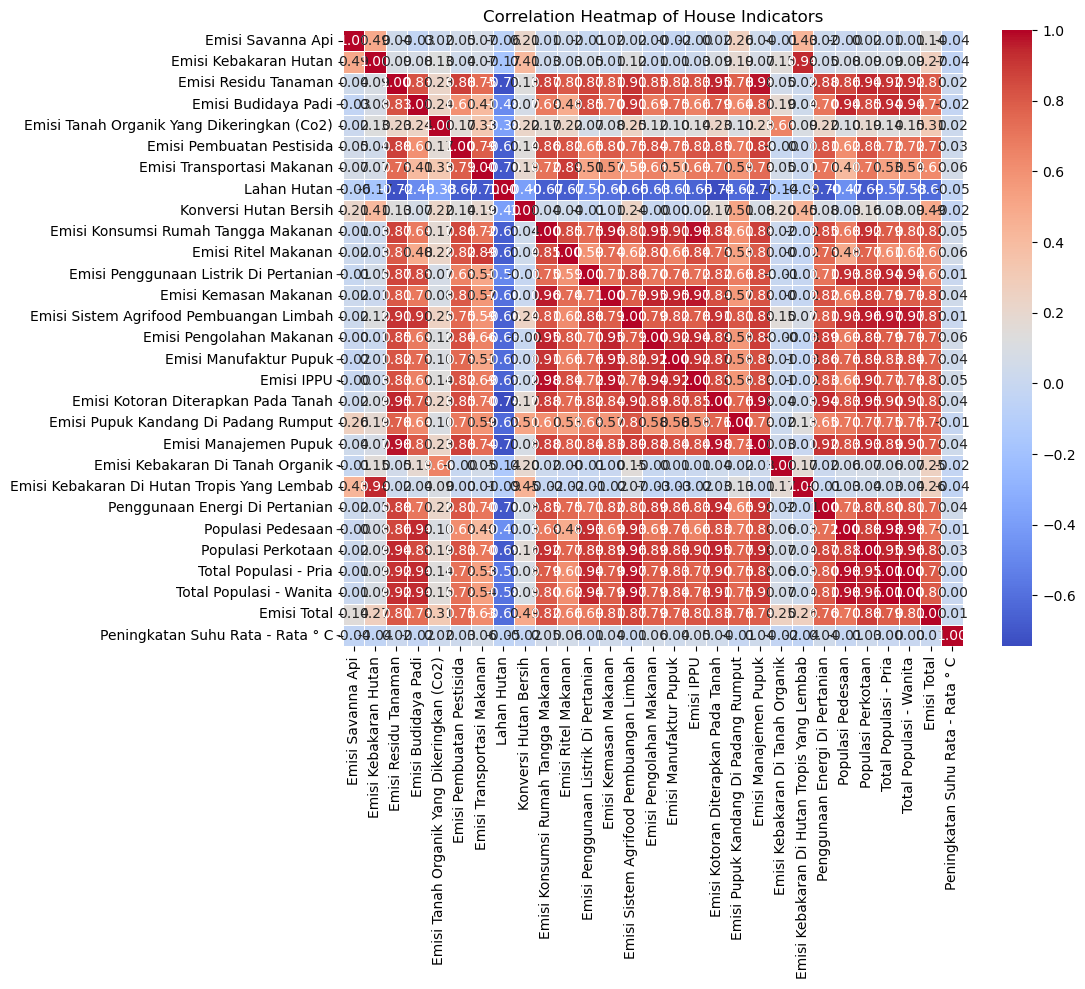

In [49]:
df_numeric = dftrain.select_dtypes(include=['number'])  
corr_matrix = df_numeric.corr()  

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

plt.title('Correlation Heatmap of House Indicators')
plt.show()

LETSGO MARI KTIA TRAIN